<a href="https://colab.research.google.com/github/mangoubi/DS595-ST-Machine-Learning-for-Engineering-Science-Applications/blob/main/CaseStudy__1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Polymer Melt Flow Rate

This case study is based upon the excellent example below:

http://apmonitor.com/pds/index.php/Main/PolymerMeltFlowRate

Along with its github repository:

https://github.com/APMonitor/pds

and license:

https://github.com/APMonitor/pds/blob/main/LICENSE

In particular, as described on the web page above:

Polymer properties such as density, melt index, and melt flow rate must be kept within tight specifications for each grade. This case study is to analyze polymer production data to predict melt flow rate.

**Background:** There are gas phase and liquid slurry reactors that create polymers (polyethylene, polypropylene, polystyrene, and others) from chemical building blocks known as monomers (C2=, C3=, C4=, iC5=, and others). A catalyst is injected with the monomers under carefully controlled temperature and pressure conditions to cause a reaction that grows the polymer chains. Hydrogen is a chain transfer agent to stop the growth of the polymer chain. If the polymer chains grow too long then the polymer is too viscous for manufacturing in films, injection molding, or other applications.

This case study focuses on measurements of Melt Flow Rate (MFR) to determine the polymer viscosity based on reactor conditions. An accurate model is desirable so that the infrequent lab samples (every 2-8 hours) are supplemented with a virtual and continuous "soft sensor". A model that runs in real-time simulation alongside the physical reactor is called a digital twin.

| Label | Data File Tag   | Description |
|------|------|------|
|   Time  | | Timestamp of the measurements|
|   C3  | 513FC31103.pv| Propylene (C3=) Feed Rate (kg/hr)|
|   H2R  | 513HC31114-5.mv| Hydrogen to C3= Ratio|
|   Pressure  | 513PC31201.pv| Reactor Pressure (bar)|
|   Level  | 513LC31202.pv| Reactor Bed Level (m)|
|   C2  | 513FC31409.pv| Ethylene (C2=) Flow (kg/hr)|
|   Cat  | 513FC31114-5.pv| Catalyst Feed Rate (kg/hr)|
|   Temp  | 513TC31220.pv| Reactor Temperature|
|   MFR  | MFR| Melt Flow Rate (gm/10min)|

**References**

Hedengren, J. D. (2021, December 16). Polymer Melt Flow Rate, Machine Learning for Engineers. Retrieved from http://apmonitor.com/pds/index.php/Main/PolymerMeltFlowRate



# Naive solution

### Import Polymer MFR Data


Don't worry, the data has been cached on the github page for this class so you can access it directly by url. Easy!

In [ ]:
url = 'https://raw.githubusercontent.com/rcpaffenroth/DS595-Machine-Learning-for-Engineering-and-Science-Applications/main/data/polymer_reactor.txt'

Let's read the data through pandas.  It would be great to get to know pandas. It is an important tool for Data Science in Python.

![Book cover](https://images-na.ssl-images-amazon.com/images/I/51HuYEwAl2L._SX258_BO1,204,203,200_.jpg)

https://images-na.ssl-images-amazon.com/images/I/51HuYEwAl2L._SX258_BO1,204,203,200_.jpg

In [ ]:
import pandas as pd
data = pd.read_csv(url)

In [ ]:
data

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
...,...,...,...,...,...,...,...,...,...
2559,12-10-18 9:45,24437.988,0.185,31.025928,77.189499,24022.730,0.103966,81.783371,12.3
2560,12/17/2018 16:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,12/17/2018 18:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,12/27/2018 5:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7


What does all this mean? 513FC31103.pv	513HC31114-5.mv	513PC31201.pv	513LC31202.pv	513FC31409.pv	513FC31114-5.pv	513TC31220.pv.   What do the column labels mean?  You probably want to map them to something more meaningful.

![?](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2W-Aq7YoFONiyUsix1x8wXnlesgqEyDShTA&usqp=CAU)

In [ ]:
data = data.set_axis(['Time','C3','H2R','Pressure','Level','C2','Cat','Temp','MFR'], axis=1)

In [ ]:
data

,Time,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
...,...,...,...,...,...,...,...,...,...
2559,12-10-18 9:45,24437.988,0.185,31.025928,77.189499,24022.730,0.103966,81.783371,12.3
2560,12/17/2018 16:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,12/17/2018 18:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,12/27/2018 5:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7


Nice, now I know what they are. 🙂

### Regression Modeling

Now, we have the data and we know what they are. We learned a lot from lecture and can't wait to try the machine learning algorithms. Let's start.

#### Divide Data

What is the first step?  We need to divide the training set and the test set.

"Data is divided into train and test sets to separate a fraction of the rows for evaluating classification or regression models. A typical split is 80% for training and 20% for testing, although the range depends on how much data is available and the objective of the study."

The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets.

```python
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)
```

There are options such as `shuffle=True` to randomize the selection in each set.

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.2, shuffle=True, random_state=1)

Can't wait any longer to run the model?


#### Run model
Let's try linear regression using sklearn!

In [ ]:
from sklearn import linear_model
method = linear_model.LinearRegression()

What columns are used as features? What columns are used as labels?
Don't know? Then let's use them all first, except for time, since time is not important in this case.

**Features：**C3, H2R, Pressure, Level, C2, Cat, Temp

**label：** MFR


In [ ]:
model = method.fit(train[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),train['MFR'].to_numpy())

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

ValueError: Input contains NaN????

![?](https://www.memecreator.org/static/images/memes/4724747.jpg)

Wow! We forgot to check if there are any null values in the dataset. 😞


data.isnull() is used to check if there is null value in the dataset. We can sum them by using sum().

data.info() and data.describe() are usually used to check the properties and basic statistics of the data.

In [ ]:
train.isnull().sum().sum()

431

In [ ]:
test.isnull().sum().sum()

49

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 1093 to 1061
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      2051 non-null   object 
 1   C3        1981 non-null   float64
 2   H2R       2048 non-null   float64
 3   Pressure  1979 non-null   float64
 4   Level     1979 non-null   float64
 5   C2        1979 non-null   float64
 6   Cat       1981 non-null   float64
 7   Temp      1979 non-null   float64
 8   MFR       2051 non-null   float64
dtypes: float64(8), object(1)
memory usage: 160.2+ KB


In [ ]:
train.describe()

,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
count,1981.000000,2048.000000,1979.000000,1979.000000,1979.000000,1981.000000,1979.000000,2051.000000
mean,25342.035768,0.178165,30.659640,77.659450,42662.841313,0.138533,80.137342,8.229449
std,1701.939333,0.079322,0.432810,0.930477,11375.945853,0.042061,0.846325,5.084612
min,16106.025000,0.000000,26.946344,74.575958,9610.464800,0.022162,77.760117,1.500000
25%,24397.914000,0.135000,30.444627,76.994495,34932.478500,0.113763,79.666259,3.700000
50%,25394.648000,0.172000,30.618645,77.501343,41954.355000,0.132688,80.035500,4.400000
75%,26434.447000,0.200000,30.928010,78.233005,50109.232500,0.156993,80.497383,12.900000
max,30083.688000,0.980000,32.674332,83.841675,106073.610000,0.677979,91.566544,38.000000


Yes, null values do exist in the dataset, let's delete them first.

data.dropna() is used to remove the rows that contain null value.

In [ ]:
train_dropna = train.dropna()
test_dropna = test.dropna()

In [ ]:
train_dropna.isnull().sum().sum()

0

In [ ]:
test_dropna.isnull().sum().sum()

0

Now, let's try to run the model again!

In [ ]:
model = method.fit(train_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),train_dropna['MFR'].to_numpy())

Great!!! The model was successfully fit！ 🙂 Now, we can evaluate the performance on test set.

In [ ]:
from sklearn.metrics import mean_squared_error
r2 = method.score(test_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),test_dropna['MFR'].to_numpy())
mse = mean_squared_error(method.predict(test_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy()), test_dropna['MFR'].to_numpy())

print('R^2: ' + str(r2))
print('mse: ' + str(mse))

R^2: 0.42624499119957326
mse: 14.935927259730697


Ok, we already see things are interesting.  There are two different metrics (R^2 and mse)!   Hmmm....

## **Question 1** **(10 points)**

**Part 1 (5 points)**

What do R^2 and mse mean? Which is better for describing the performance of your algorithm?  Why?

**Part 2 (5 points)**  

Try different variables to fit the model and test its performance.   What do you notice?  Are some worse and some better?

Hint:
model = method.fit(train_dropna[['Your selected variable 1', 'Your selected variable 2']].to_numpy(),train_dropna['MFR'].to_numpy())

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

# Solution with Feature Engineering

How did you choose the variables? Why use these variables instead of others?

![?](https://media.makeameme.org/created/its-a-feature-5b167b.jpg)

How about we create a heatmap to show the correlation between the variables?

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

Still remember? Removing null values.

In [ ]:
data = data.dropna()

we can create a heatmap using seaborn.heatmap()

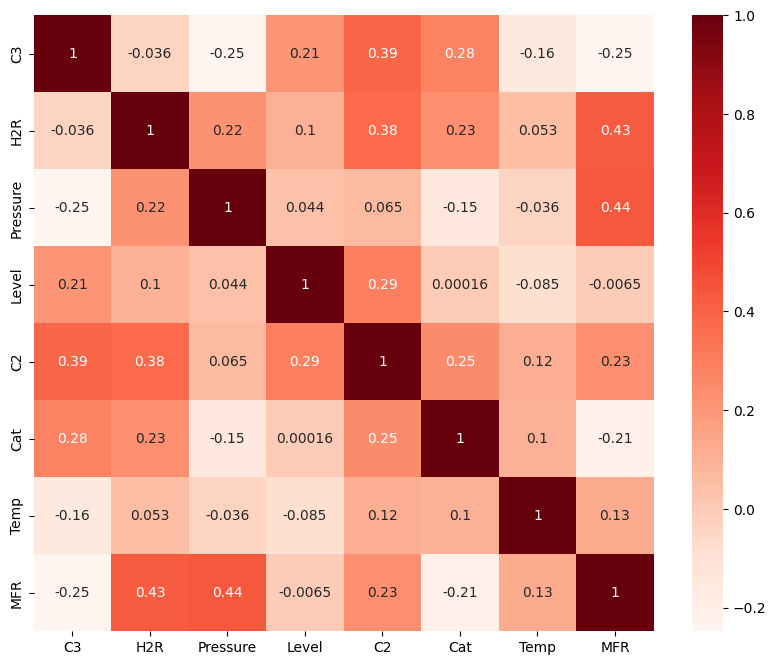

In [ ]:
plt.figure(figsize=(10,8))
cor = data.corr(numeric_only=True)
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

## **Question 2** **(20 points)**

**Part 1 (5 points)**
What does correlation mean?

**Part 2 (10 points)**
What are your observations? Which variables are strongly correlated with MFR and which variables are weakly correlated with MFR?

**Part 3 (5 points)**
Is a variable with a large *negative* correlation useful or not?


In [ ]:
# Your answer here
# Your answer here
# Your answer here
# Your answer here
# Your answer here

### Pair Plot

A pair plot shows the correlation between variables.

```python
sns.pairplot(data)
```

It has bar distributions on the diagonal and scatter plots on the off-diagonal. A pair plot also shows a different color (`hue`) by category `w`. Pair plots show correlations between pairs of variables that may be related and gives a good indication of features (explanatory inputs) that are used for classification or regression. Generate your own pair plot of the data.

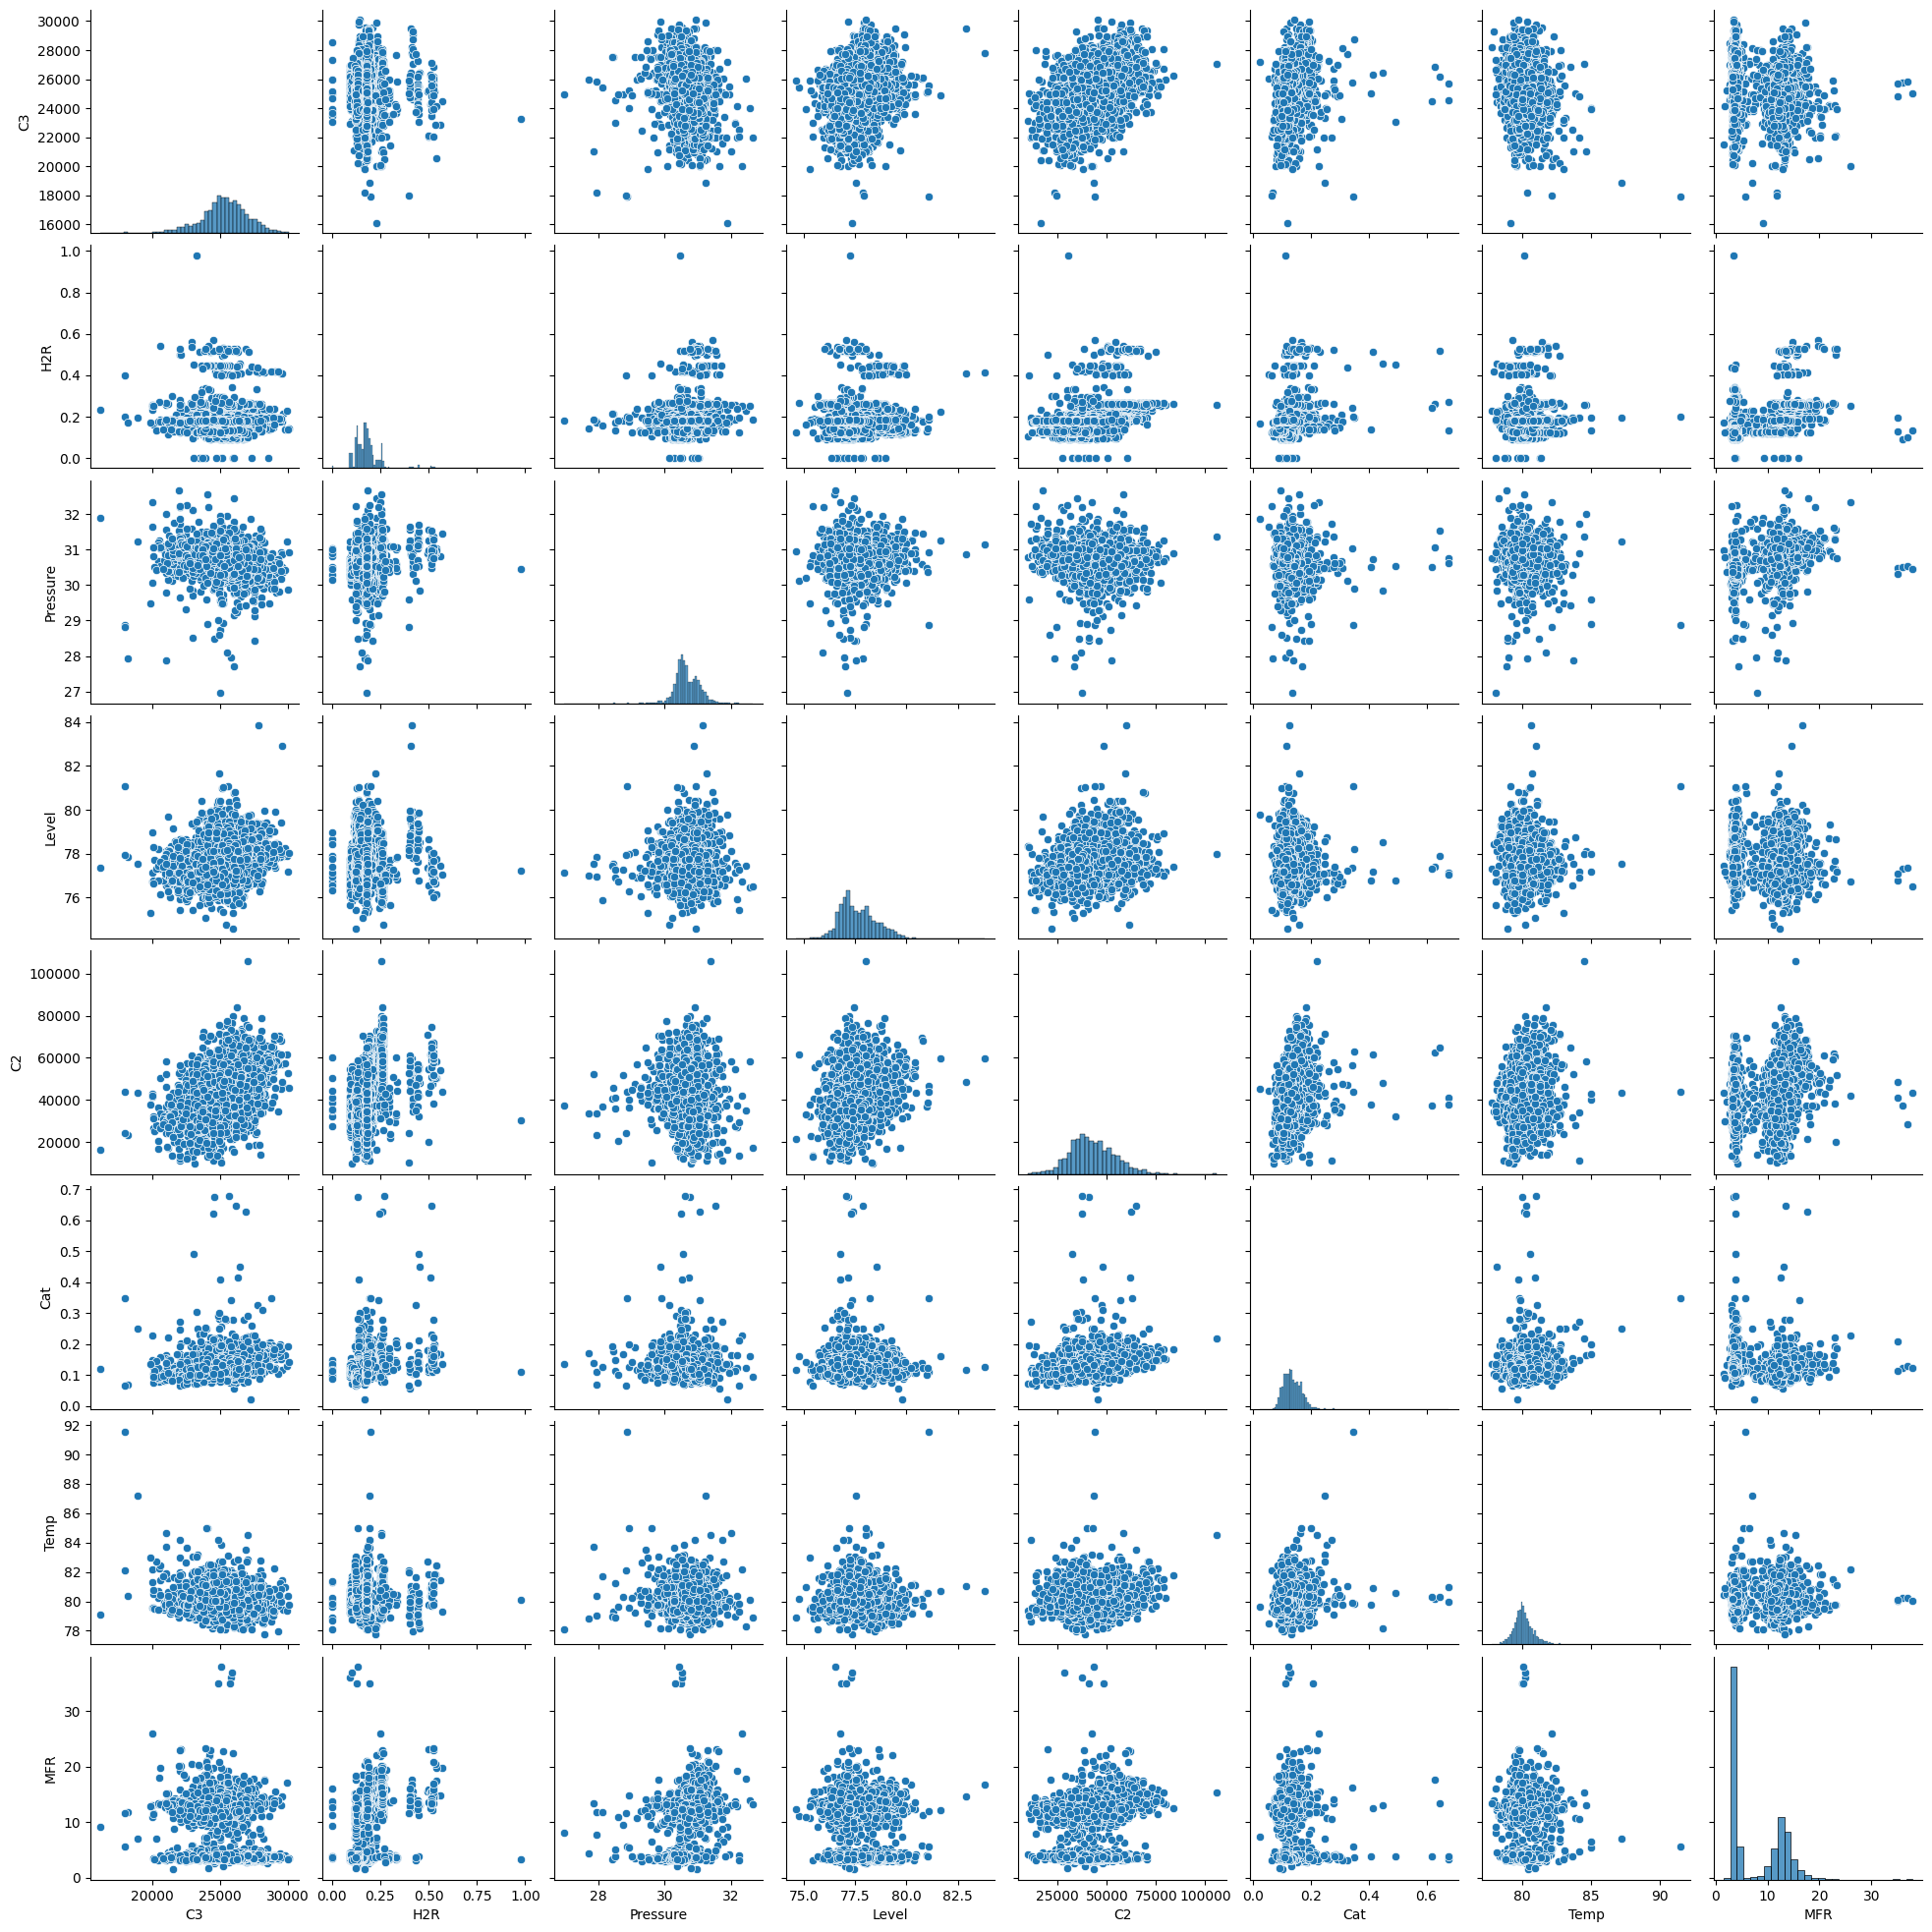

In [ ]:
sns.pairplot(data)

### Joint Plot

Want to change the plot style? No problem! 👌

A joint plot shows two variables, with the univariate and joint distributions.

```python
sns.jointplot(x='H2R',y='MFR',data=data,kind="kde")
```

Generate your own joint plot with the data. Try `kind='reg'`, `'kde'`, and `'hex'` to see different joint plot styles.

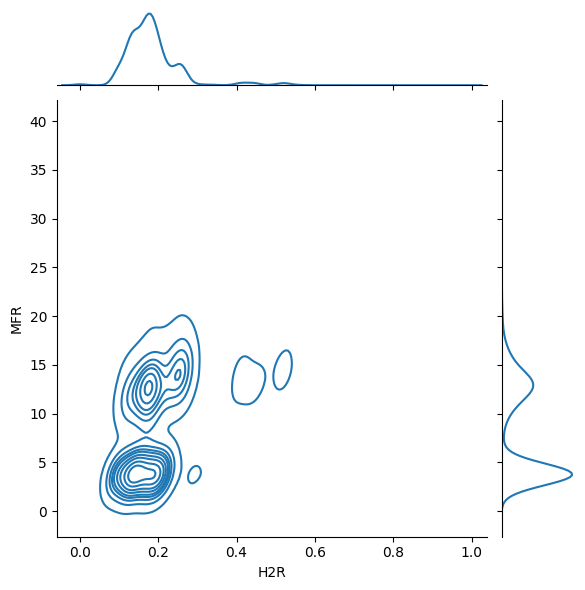

In [ ]:
sns.jointplot(x='H2R',y='MFR',data=data,kind="kde")

## **Question 3** **(10 points)**

Find the two most "relevant" variables to MFR and fit them with linear regression. Cut and paste their "Interaction" plots here.  Why do you think they are relevant?

Compare the results (r^2 and mse) using these variables with your previous experiments.


In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

Tired of manually selecting variables? We can use the model to select best features (variables) automatically.

### Select Best Features

We can rank the features to determine the best set that predicts `MFR`.

```python
from sklearn.feature_selection import SelectKBest, f_regression
best = SelectKBest(score_func=f_regression, k='all')
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)
```

There is additional information on [Select K Best Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<BarContainer object of 7 artists>

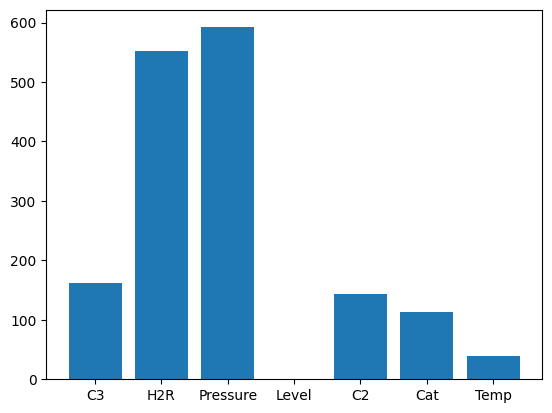

In [ ]:
x=data[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']]
z=data[['MFR']]

from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pylab as plt
best = SelectKBest(score_func=f_regression, k='all')
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)

## **Question 4** **(10 points)**

Based on the above results, select the variables you think are related to MFR and fit them with linear regression. Compare the results with the previous experiments.  What do observe?


In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

# Solution with Feature Engineering + Data processing

The result of the model is not good enough? Still want to improve the performance further?

I have a few questions for you. Are there any outliers in the data? Do all variables satisfy the assumptions of the linear model?

![?](https://memegenerator.net/img/instances/65857782.jpg)

There are several graphical techniques to help detect outliers. A box or histogram plot shows outlying points. Make one now and examine it for outliers in each variable.

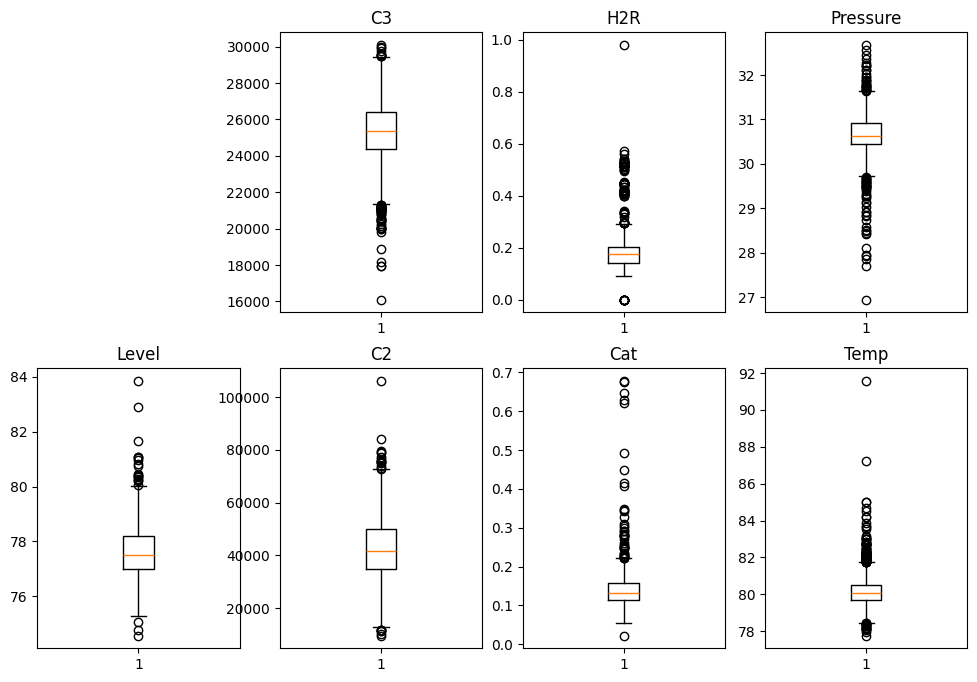

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
for i,c in enumerate(data.columns):
    # Skip the 'Time' column
    if c != 'Time' and i <= 7:
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()


Remove outliers by removing select rows such as with:

```python
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]
```

to keep only values of `H2R` (Hydrogen to Monomer ratio) that are between 0.01 and 0.7.

In [ ]:
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]

Show the boxplot again to verify that the data set does not have the outliers you removed.

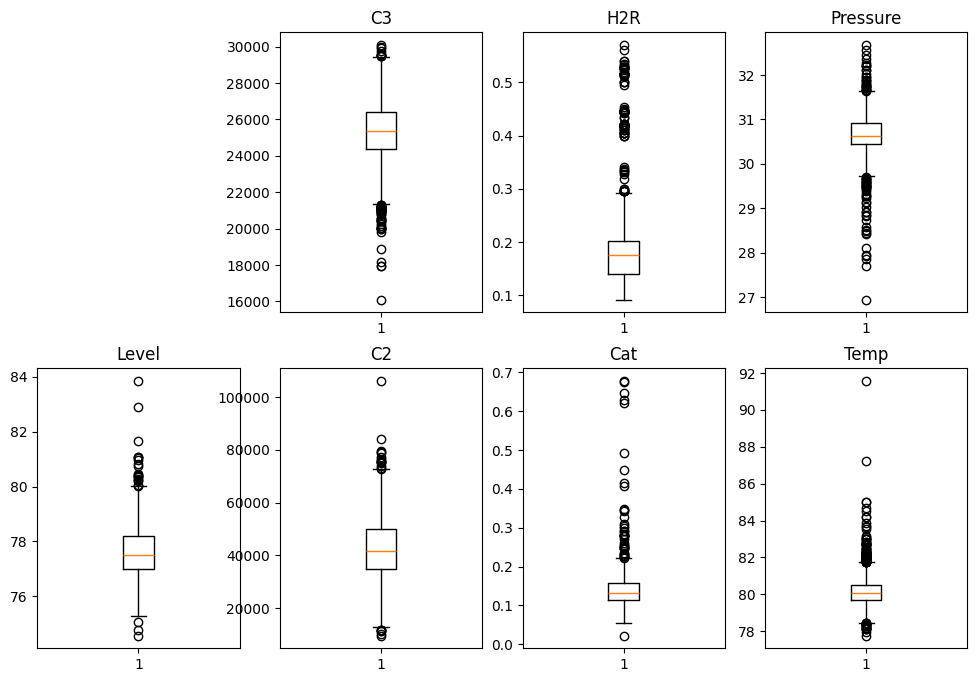

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for np.int64 and np.float64
%matplotlib inline
plt.figure(figsize=(12,8))
for i,c in enumerate(data.columns):
    # Skip the 'Time' column or any non-numeric column
    if data[c].dtype in [np.int64, np.float64] and i <= 7:  # Check if column is numeric
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

## **Question 5** **(10 points)**

Are there any other outliers in other variables? If so, please remove them.  How did you go about defining outliers?

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

# Important question!

Who controls the features that you process?  As you truck with the features provided by the original experiment?

**NO!!!!**

You have the power!  For example, any invertible transformation of the data can lead to new features or even new targets!   Actually any transformation whatsoever can lead to new features and targets.  Invertible just means that you can always recover your original data :-)

For example, we can apply log transformation to MFR and try and predict that instead.  Since the log is invertible, we can just predict that, get an prediction, and then apply the inverse of the log (the exponential map).

Create a new column for the natural log of (MFR) as `lnMFR`.

In [ ]:
import numpy as np
data['lnMFR'] = np.log(data['MFR'])

Check the results after log transformation

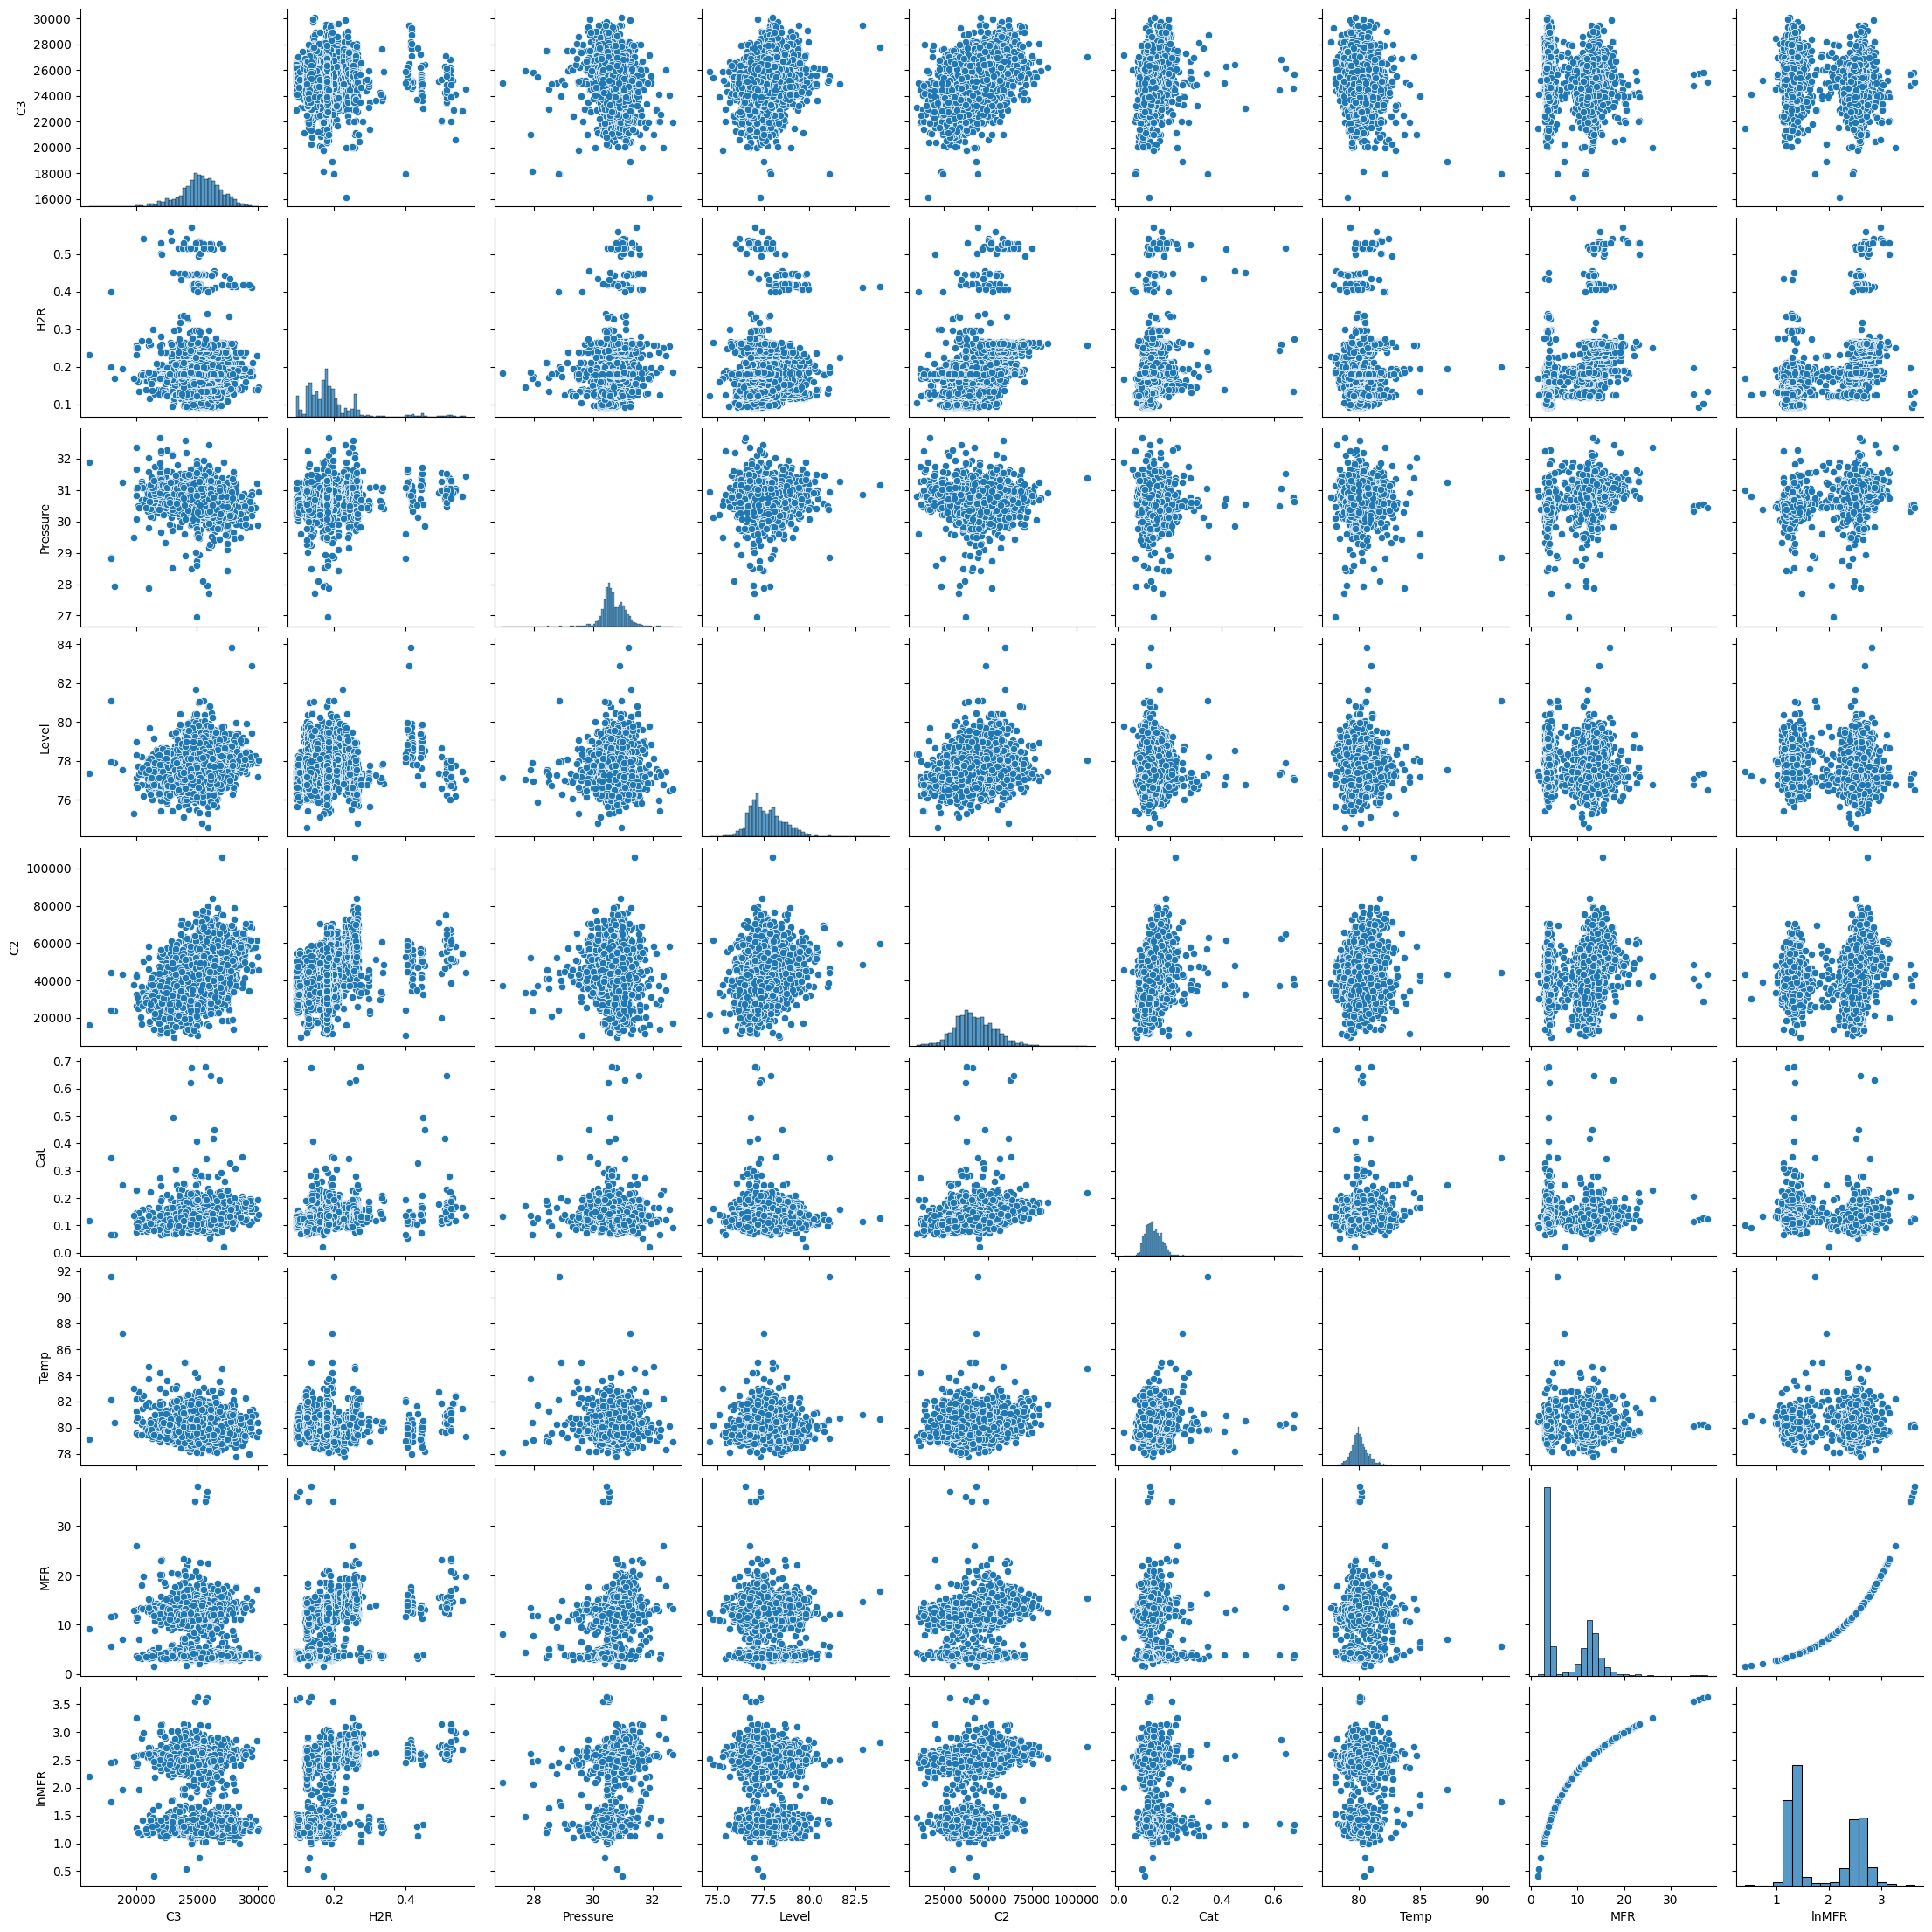

In [ ]:
sns.pairplot(data)

## **Question 6** (10 points)

Pick one or two different functions and apply them to MFR, to see if a transformed MFR is easier to predict.  Does transforming MFR change what inputs give good predictions?


In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

## **Question 7** (10 points)

Just as you can use transformations on the target (MFR in this case), you can also use transformations on the inputs.  Can you predict a transformed MFR from a set of transformed inputs?

Ok, things start to explode now with so many combinations.  Just try a few :-)

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

### One important transformation:  Scaling the data

Scale data with the Standard Scalar from scikit-learn.

```python
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
```

In [ ]:
# Convert 'Time' column to datetime if it is not already
data['Time'] = pd.to_datetime(data['Time'])

# Extract numeric features for scaling
numeric_features = data.select_dtypes(include=['number']).columns
data_to_scale = data[numeric_features]

# Now apply StandardScaler
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data_to_scale)

# Convert the scaled data back to a DataFrame
ds = pd.DataFrame(ds, columns=numeric_features, index=data.index)

# If you need the 'Time' column in the scaled DataFrame, add it back
ds['Time'] = data['Time']

<ipython-input-35-82336051ca55>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


The value `ds` is returned as a `numpy` array so we need to convert it back to a `pandas` `DataFrame`.

```python
ds = pd.DataFrame(ds,columns=data.columns)
```

Re-use the column names from `data`.

In [ ]:
ds = pd.DataFrame(ds,columns=data.columns)

Now, we can check the results before/after scaling.

In [ ]:
data.describe()

,Time,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR,lnMFR
count,2472,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000
mean,2018-08-12 02:36:53.592232960,25306.234407,0.184220,30.663528,77.651793,42541.785562,0.138636,80.145742,8.031756,1.881117
min,2018-04-05 19:45:00,16106.025000,0.092000,26.946344,74.575958,9610.464800,0.022162,77.760117,1.500000,0.405465
25%,2018-06-22 13:15:00,24362.821500,0.140000,30.445727,76.993517,34795.535000,0.113805,79.678614,3.700000,1.308333
50%,2018-08-12 14:45:00,25366.086500,0.175000,30.622256,77.498005,41580.888500,0.133056,80.044605,4.300000,1.458615
75%,2018-10-10 08:15:00,26398.258750,0.202000,30.925738,78.210867,50019.041750,0.157279,80.497479,12.725000,2.543563
max,2018-12-10 09:45:00,30083.688000,0.570000,32.674332,83.841675,106073.610000,0.677979,91.566544,38.000000,3.637586
std,NaN,1706.422682,0.069459,0.423863,0.920032,11340.624549,0.041936,0.822809,5.077559,0.635984


In [ ]:
ds.describe()

,Time,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR,lnMFR
count,2472,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2472.000000,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03
mean,2018-08-12 02:36:53.592232960,1.287715e-15,-1.609644e-16,-8.864538e-15,2.851369e-15,0.000000,-2.529440e-16,2.874364e-16,9.197964e-17,1.149746e-16
min,2018-04-05 19:45:00,-5.392609e+00,-1.327964e+00,-8.771559e+00,-3.343859e+00,-2.904424,-2.777966e+00,-2.899955e+00,-1.286657e+00,-2.320737e+00
25%,2018-06-22 13:15:00,-5.529719e-01,-6.367664e-01,-5.139515e-01,-7.156375e-01,-0.683191,-5.922263e-01,-5.678397e-01,-8.532904e-01,-9.008097e-01
50%,2018-08-12 14:45:00,3.508170e-02,-1.327684e-01,-9.738905e-02,-1.671888e-01,-0.084748,-1.330982e-01,-1.229421e-01,-7.350995e-01,-6.644631e-01
75%,2018-10-10 08:15:00,6.400790e-01,2.560302e-01,6.187461e-01,6.077914e-01,0.659467,4.446434e-01,4.275692e-01,9.244982e-01,1.041818e+00
max,2018-12-10 09:45:00,2.800256e+00,5.555210e+00,4.744960e+00,6.729261e+00,5.603279,1.286359e+01,1.388307e+01,5.903291e+00,2.762373e+00
std,NaN,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00


Resplit the processed dataset into training and test set.

**Set a same random_state=1 to make the spliting is same as the previous one.**

NOTE:  We will come back to this important point later 🧙

In [ ]:
from sklearn.model_selection import train_test_split
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1)

## **Question 8** (10 points)

Use the processed training data (i.e. the dataset where we rescaled the data) to train the linear regression model, and report the results. Do the models perform better than before? Why?

Hint:

method = linear_model.LinearRegression()

model = method.fit(train_processed[['variable 1','variable 2']].to_numpy(),train_processed['MFR'].to_numpy())

r2 = method.score(test_processed[['variable 1','variable 2']].to_numpy(),test_processed['MFR'].to_numpy())

mse = mean_squared_error(method.predict(test_processed[['variable 1','variable 2']].to_numpy()), test_processed['MFR'].to_numpy())

print('R^2: ' + str(r2))

print('mse: ' + str(mse))

# More advanced solution

Want to learn more? Let's look at a more advanced solution.

![?](https://i.imgflip.com/2l2aus.jpg)

Let's try a count plot to show the number of binned samples of `lnMFR`.

<Axes: xlabel='lnMFR', ylabel='count'>

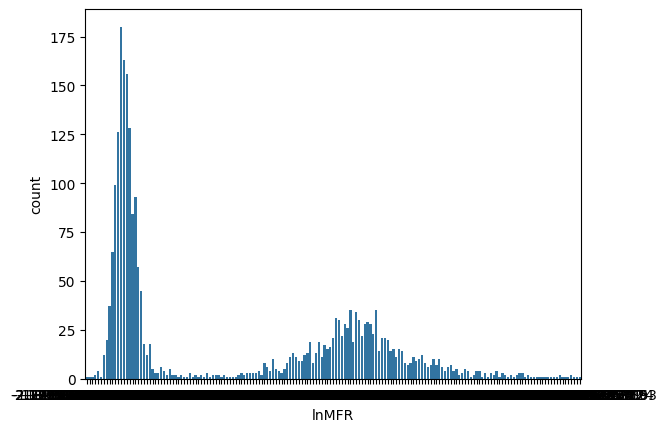

In [ ]:
sns.countplot(x=ds['lnMFR'])

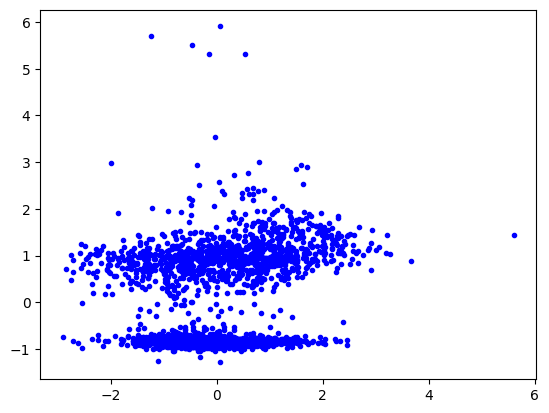

In [ ]:
plt.plot(ds['C2'], ds['MFR'],'b.')

Note the interesting distribution of the data- it has a multimodal Gaussian distribution, in this case with two peaks.

Why not split the data into two parts, one for each Gaussian, then perform regression on each part separately? Will this regression perform better than a single regression algorithm for the full dataset?

First we split the data into two parts, then make train/test splits of each part with

In [ ]:
from sklearn.model_selection import train_test_split
lower_data = ds[ds['lnMFR']<0]
upper_data = ds[ds['lnMFR']>0]
lower_train,lower_test = train_test_split(lower_data, test_size=0.2, shuffle=True,random_state=1)
upper_train,upper_test = train_test_split(upper_data, test_size=0.2, shuffle=True,random_state=1)

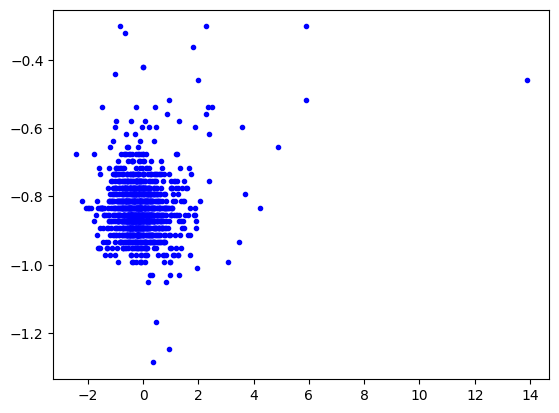

In [ ]:
plt.plot(lower_data['Temp'], lower_data['MFR'],'b.')

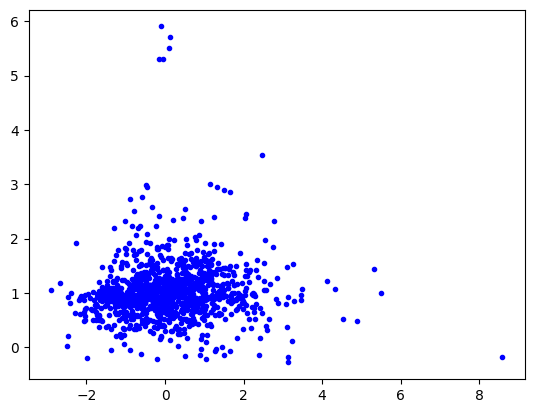

In [ ]:
plt.plot(upper_data['Temp'], upper_data['MFR'],'b.')

Run the following code to test linear regression on the full data set as well as the subsets.

In [ ]:
def fits(data):
    X = ['Temp']
    y = ['MFR']
    # change this if you applied log transformation to your selected variables.
    method = linear_model.LinearRegression()

    model = method.fit(data[X].to_numpy(), data[y].to_numpy())

    MFR_pred = method.predict(data[X].to_numpy())
    r2_model = method.score(data[X].to_numpy(),data['lnMFR'].to_numpy())
    mse_model = mean_squared_error(method.predict(data[X].to_numpy()), data['lnMFR'].to_numpy())

    print('R^2: ' + str(r2_model))
    print('mse: ' + str(mse_model))

    plt.plot(data[X[0]], data[y],'b.')
    plt.plot(data[X[0]], MFR_pred,'r.')


    return

R^2: -94.34579866409676
mse: 38.549421752907236


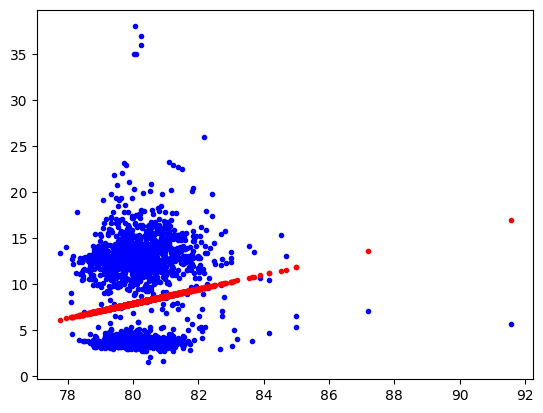

In [ ]:
fits(data)

R^2: -0.04173509309463075
mse: 0.03235635940269502


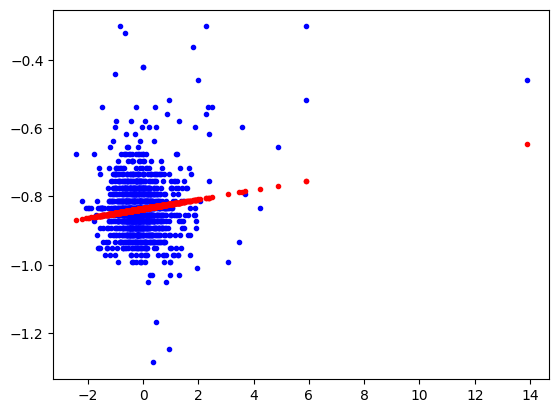

In [ ]:
fits(lower_data)

R^2: -0.028288063232688065
mse: 0.08885947451368041


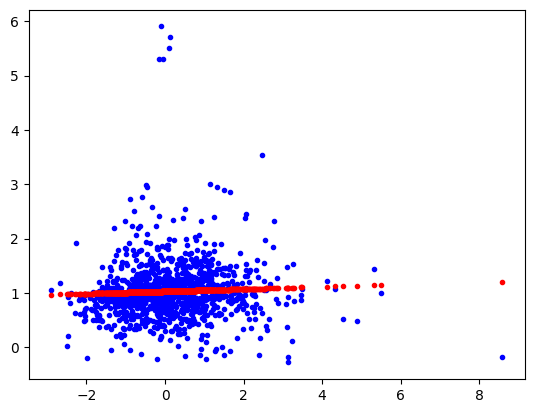

In [ ]:
fits(upper_data)

## **Question 9** (10 points)

Does it make sense to split the data like we did above based on the value of the MFR variable, and do two separate regressions?  Why or why not?  (Hint: Can you apply the trained model on new data where you do not yet know the value of the labels?)

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

## **Question 10** **(Extra credit: 10 points... Note: the maximum score you can get on this homework is 100%)**

Play around with doing a better analysis.  Things to try:

1.   Redo the calculations, but start from the split dataset above.
2.   Try different train and test splits and see if the answer changes (i.e.,
```
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1234)
```
3.   Try different methods such as `linear_model.LinearRegression()`, `KNeighborsRegressor(n_neighbors=20)`, `linear_model.Ridge()`, `linear_model.Lasso()`, or `linear_model.BayesianRidge()`. Can you achieve better performance than any of the previous models?

4.  Answer the following question carefully:  What is the problem with using this method of selecting a model based on its performance on testing data?
